<a href="https://colab.research.google.com/github/jayanth142006/potato-disease-classification-models/blob/main/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, ReLU
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_path = '/content/drive/MyDrive/potato_dis_aug'
img_size = (224, 224)
batch_size = 32
num_classes = 7 # Adjust based on your dataset

# Data Preprocessing (Augment Train, No Augment Validation)
data_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 80% train, 20% validation
)

data_gen_valid = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen_train.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = data_gen_valid.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5405 images belonging to 7 classes.
Found 1347 images belonging to 7 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze All Convolutional Layers (Feature Extraction Phase)
for layer in base_model.layers:
    layer.trainable = False

# Build the Classifier on Top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 2275s 13s/step - accuracy: 0.2962 - loss: 1.8234 - val_accuracy: 0.5895 - val_loss: 1.1866
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 186s 906ms/step - accuracy: 0.5157 - loss: 1.2994 - val_accuracy: 0.6140 - val_loss: 1.0511
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 858ms/step - accuracy: 0.5482 - loss: 1.1597 - val_accuracy: 0.6414 - val_loss: 0.9651
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 208s 894ms/step - accuracy: 0.5776 - loss: 1.1305 - val_accuracy: 0.6615 - val_loss: 0.9341
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 147s 868ms/step - accuracy: 0.6237 - loss: 1.0508 - val_accuracy: 0.6823 - val_loss: 0.8643
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 148s 876ms/step - accuracy: 0.6077 - loss: 1.0450 - val_accuracy: 0.6140 - val_loss: 0.9864
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 885ms/step - accuracy: 0.6469 - loss: 0.9920 - val_accuracy: 0.6964 - val_loss: 0.8295
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 150s 889ms/step - accuracy: 0.6477 - 

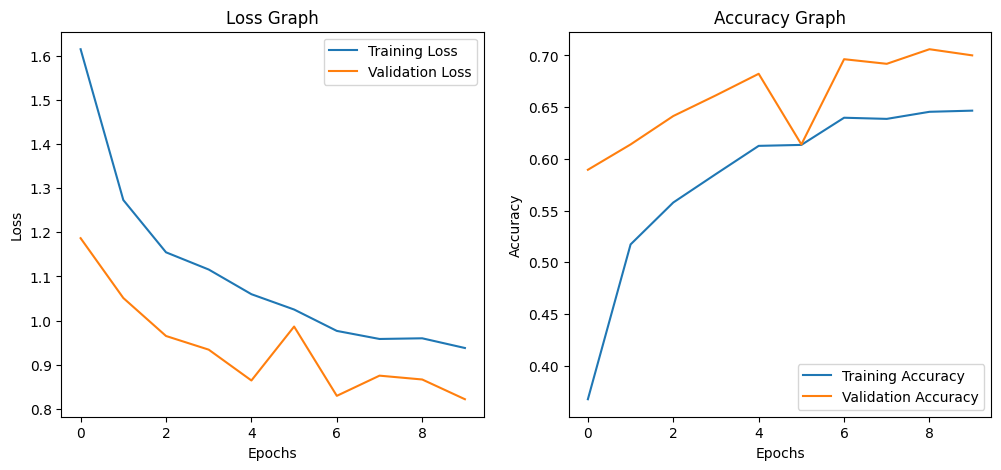

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

plt.show()


43/43 ━━━━━━━━━━━━━━━━━━━━ 25s 513ms/step
Before Fine-Tuning:
              precision    recall  f1-score   support

    Bacteria       0.98      0.73      0.84       221
       Fungi       0.68      0.73      0.70       293
     Healthy       0.53      0.76      0.62       116
    Nematode       0.91      0.91      0.91       131
        Pest       0.50      0.57      0.53       236
 Phytopthora       0.94      0.60      0.73       140
       Virus       0.67      0.68      0.67       210

    accuracy                           0.70      1347
   macro avg       0.74      0.71      0.72      1347
weighted avg       0.73      0.70      0.71      1347



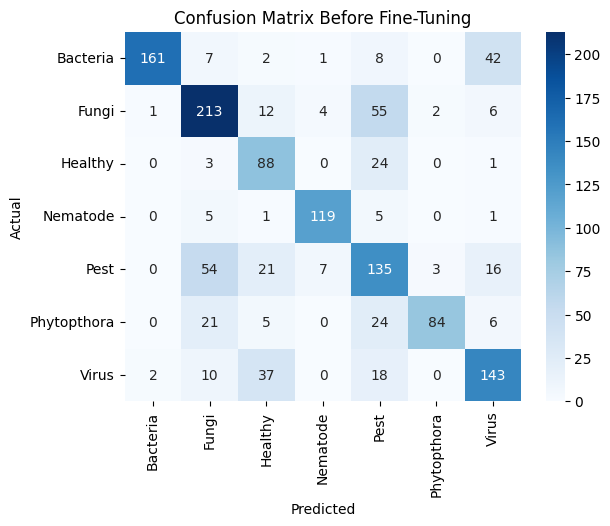

In [ ]:
val_preds = model.predict(valid_generator)
y_true = valid_generator.classes
y_pred = np.argmax(val_preds, axis=1)

# Classification Report
print("Before Fine-Tuning:")
print(classification_report(y_true, y_pred, target_names=valid_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Before Fine-Tuning')
plt.show()

In [ ]:
for layer in base_model.layers[:106]:
    layer.trainable = False
for layer in base_model.layers[106:]:
    layer.trainable = True

In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 150s 887ms/step - accuracy: 0.6386 - loss: 0.9446 - val_accuracy: 0.7223 - val_loss: 0.7645
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 907ms/step - accuracy: 0.6613 - loss: 0.9429 - val_accuracy: 0.7030 - val_loss: 0.8086
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 152s 897ms/step - accuracy: 0.6735 - loss: 0.8834 - val_accuracy: 0.7275 - val_loss: 0.7598
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 909ms/step - accuracy: 0.6675 - loss: 0.8994 - val_accuracy: 0.7327 - val_loss: 0.7400
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 150s 888ms/step - accuracy: 0.6722 - loss: 0.9021 - val_accuracy: 0.7290 - val_loss: 0.7532
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 152s 900ms/step - accuracy: 0.6759 - loss: 0.8888 - val_accuracy: 0.7164 - val_loss: 0.7457
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 155s 917ms/step - accuracy: 0.6939 - loss: 0.8510 - val_accuracy: 0.7424 - val_loss: 0.7255
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 157s 931ms/step - accuracy: 0.6827 -

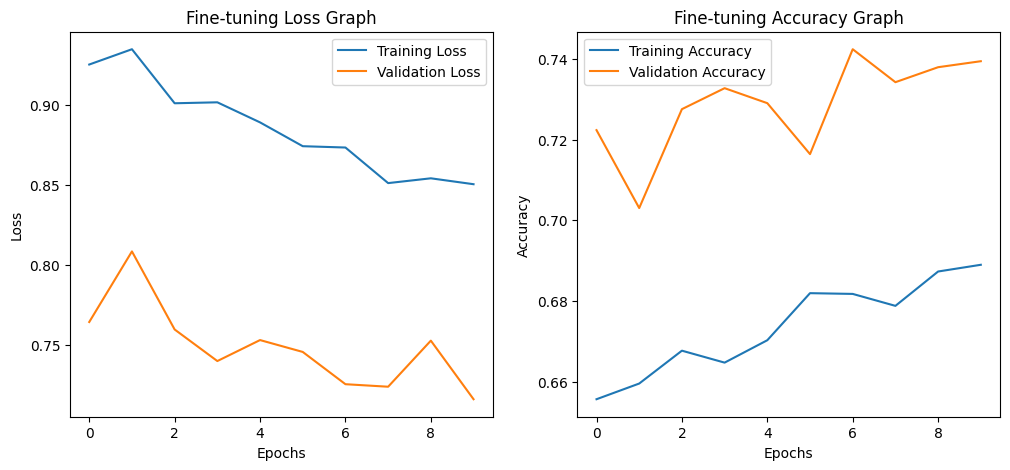

In [ ]:

train_loss_ft = history_finetune.history['loss']
val_loss_ft = history_finetune.history['val_loss']
train_acc_ft = history_finetune.history['accuracy']
val_acc_ft = history_finetune.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_ft, label='Training Loss')
plt.plot(val_loss_ft, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Fine-tuning Loss Graph')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_ft, label='Training Accuracy')
plt.plot(val_acc_ft, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fine-tuning Accuracy Graph')
plt.legend()

plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 430ms/step
After Fine-Tuning:
              precision    recall  f1-score   support

    Bacteria       0.96      0.82      0.88       221
       Fungi       0.69      0.74      0.71       293
     Healthy       0.62      0.80      0.70       116
    Nematode       0.94      0.89      0.92       131
        Pest       0.62      0.49      0.55       236
 Phytopthora       0.83      0.74      0.78       140
       Virus       0.65      0.81      0.72       210

    accuracy                           0.74      1347
   macro avg       0.76      0.76      0.75      1347
weighted avg       0.75      0.74      0.74      1347



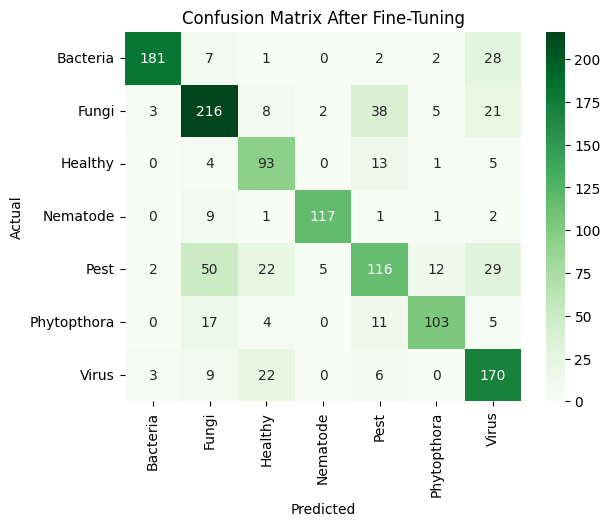

In [ ]:
val_preds_ft = model.predict(valid_generator)
y_pred_ft = np.argmax(val_preds_ft, axis=1)

# Classification Report After Fine-Tuning
print("After Fine-Tuning:")
print(classification_report(y_true, y_pred_ft, target_names=valid_generator.class_indices.keys()))

# Confusion Matrix After Fine-Tuning
cm_ft = confusion_matrix(y_true, y_pred_ft)
sns.heatmap(cm_ft, annot=True, fmt='d', cmap='Greens', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After Fine-Tuning')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Count total layers
print(f"Total number of layers: {len(base_model.layers)}")

# Optional: Print all layer names
for i, layer in enumerate(base_model.layers):
    print(f"{i+1}: {layer.name} ({layer.__class__.__name__})")


Total number of layers: 154
1: input_layer_1 (InputLayer)
2: Conv1 (Conv2D)
3: bn_Conv1 (BatchNormalization)
4: Conv1_relu (ReLU)
5: expanded_conv_depthwise (DepthwiseConv2D)
6: expanded_conv_depthwise_BN (BatchNormalization)
7: expanded_conv_depthwise_relu (ReLU)
8: expanded_conv_project (Conv2D)
9: expanded_conv_project_BN (BatchNormalization)
10: block_1_expand (Conv2D)
11: block_1_expand_BN (BatchNormalization)
12: block_1_expand_relu (ReLU)
13: block_1_pad (ZeroPadding2D)
14: block_1_depthwise (DepthwiseConv2D)
15: block_1_depthwise_BN (BatchNormalization)
16: block_1_depthwise_relu (ReLU)
17: block_1_project (Conv2D)
18: block_1_project_BN (BatchNormalization)
19: block_2_expand (Conv2D)
20: block_2_expand_BN (BatchNormalization)
21: block_2_expand_relu (ReLU)
22: block_2_depthwise (DepthwiseConv2D)
23: block_2_depthwise_BN (BatchNormalization)
24: block_2_depthwise_relu (ReLU)
25: block_2_project (Conv2D)
26: block_2_project_BN (BatchNormalization)
27: block_2_add (Add)
28: bloc